### 関数の挙動

問題の関数を次のように一般化します。 

$f(x) = \Sigma |x - a_i| + B$

まず、この関数がどのような挙動を示すかを具体的な数字を使って実験してみます。  
シンプルにするために $B=0$ とします。また、問題を解く際にも総和の項と $B$ の項は独立して扱えるため、以降の解説でも $B$ 項は無視します。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 1.0, '$f(x)=|x-1|+|x-5|+|x-8|+|x-10|$')

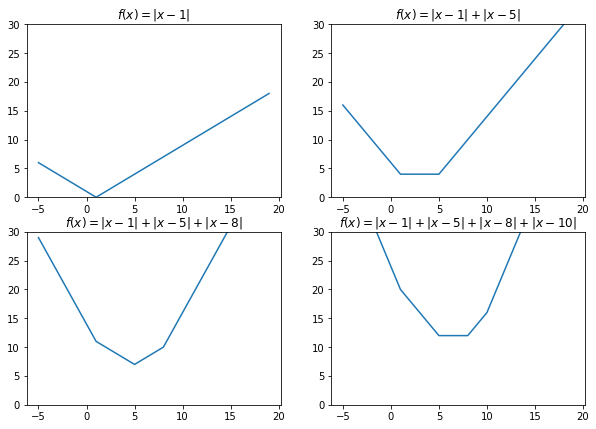

In [2]:
def f1(x):
    return abs(x - 1)

def f2(x):
    return f1(x) + abs(x - 5)  # abs(x - 1) + abs(x - 5)

def f3(x):
    return f2(x) + abs(x - 8)

def f4(x):
    return f3(x) + abs(x - 10)

x = list(range(-5, 20, 1))
y1 = [f1(a) for a in x]
y2 = [f2(a) for a in x]
y3 = [f3(a) for a in x]
y4 = [f4(a) for a in x]

fig, axs = plt.subplots(2, 2, figsize=(10, 7))

axs[0, 0].plot(x, y1)
axs[0, 0].set_ylim(0, 30)
axs[0, 0].set_title('$f(x)=|x-1|$')

axs[0, 1].plot(x, y2)
axs[0, 1].set_ylim(0, 30)
axs[0, 1].set_title('$f(x)=|x-1|+|x-5|$')

axs[1, 0].plot(x, y3)
axs[1, 0].set_ylim(0, 30)
axs[1, 0].set_title('$f(x)=|x-1|+|x-5|+|x-8|$')
                    
axs[1, 1].plot(x, y4)
axs[1, 1].set_ylim(0, 30)
axs[1, 1].set_title('$f(x)=|x-1|+|x-5|+|x-8|+|x-10|$')

1. $f(x) = |x - 1|$
2. $f(x) = |x - 1| + |x - 5|$
3. $f(x) = |x - 1| + |x - 5| + |x - 8|$
4. $f(x) = |x - 1| + |x - 5| + |x - 8| + |x - 10|$

上のグラフからわかるように、$f(x)$ は $x = a_i$ で傾きが変わる下に凸の関数となります。  
そして、この関数の最小値は $a_i$ の中央値になります。  
$a_i$ の数が偶数の場合、グラフ2, 4のように中央値前後の $a_i$ の間で関数は一定値を返します。以降、この範囲を **中央値範囲** と呼びます。

### 最小値の更新

では、新しい $a_i$ が追加されると最小値はどのように変化するのでしょうか。  
これは、追加された $a_i$ が **中央値範囲** に入っているかどうかで変わってきます。

#### 追加された $a_i$ が中央値範囲に入っている場合
この場合、**最小値は変化しません。** 具体例を見てみましょう。  

**ケース1：中央値が点の場合**  
**グラフ3** に $a_i = 5$ を追加する場合を考えてみます。この時、更新前の関数を $g(x)$ 、更新後の関数を $f(x)$ とすると問題の関数は次のように変化します。

更新前：$g(x) = |x - 1| + |x - 5| + |x - 8|$  
更新後：$f(x) = |x - 1| + |x - 5| + |x - 5| + |x - 8|$


**ケース2：中央値が範囲を持っている場合**  
**グラフ2** に $a_i = 3$ を追加する場合を考えてみます。

更新前：$g(x) = |x - 1| + |x - 5|$  
更新後：$f(x) = |x - 1| + |x - 3| + |x - 5|$

Text(0.5, 1.0, 'Case 2 After')

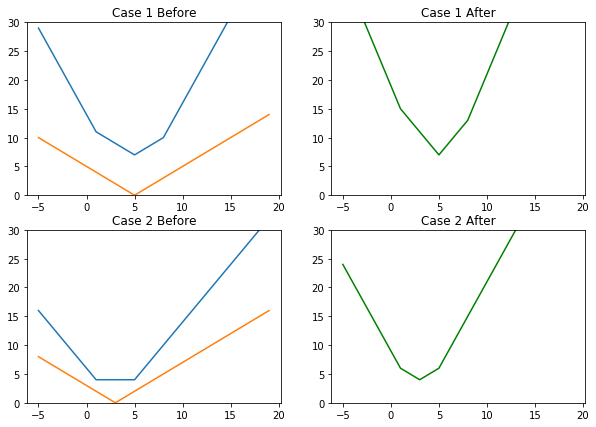

In [3]:
def f2(x):
    return abs(x - 1) + abs(x - 5)

def f3(x):
    return abs(x - 1) + abs(x - 5) + abs(x - 8)

def a3(x):
    return abs(x - 3)

def a5(x):
    return abs(x - 5)

x = list(range(-5, 20, 1))
case1_before = [f3(a) for a in x]
a5_graph = [a5(a) for a in x]
case1_after = [f3(a) + a5(a) for a in x]

case2_before = [f2(a) for a in x]
a3_graph = [a3(a) for a in x]
case2_after = [f2(a) + a3(a) for a in x]

fig, axs = plt.subplots(2, 2, figsize=(10, 7))

axs[0, 0].plot(x, case1_before)
axs[0, 0].plot(x, a5_graph)
axs[0, 0].set_ylim(0, 30)
axs[0, 0].set_title('Case 1 Before')

axs[0, 1].plot(x, case1_after, c='green')
axs[0, 1].set_ylim(0, 30)
axs[0, 1].set_title('Case 1 After')

axs[1, 0].plot(x, case2_before)
axs[1, 0].plot(x, a3_graph)
axs[1, 0].set_ylim(0, 30)
axs[1, 0].set_title('Case 2 Before')
                    
axs[1, 1].plot(x, case2_after, c='green')
axs[1, 1].set_ylim(0, 30)
axs[1, 1].set_title('Case 2 After')

上図の上が **ケース1**、下が **ケース2** であり、左が **更新前**、右が **更新後** のグラフです。更新前のグラフの青色が $f(x)$ 、オレンジ色が新しく追加される $y=|x-a_i|$ のグラフです。  
上図から分かるように、追加される $a_i$ が **中央値範囲** に含まれる場合は最小値は変化しません。

#### 追加される $a_i$ が中央値範囲の外の場合

この場合は最小値は変化し、その変化量は **更新前の中央値と追加された $a_i$ との距離** になります。更新前の中央値が点ではなく範囲を持っていた場合は、次の場合に分けられます。

1. $a_i$ が中央値範囲よりも **大きかった場合：** 最小値の変化量は **中央値範囲の最大値** と $a_i$ との距離
2. $a_i$ が中央値範囲よりも **小さかった場合：** 最小値の変化量は **中央値範囲の最小値** と $a_i$ との距離

具体例を見てみましょう。


**ケース1：中央値が点の場合**  
**グラフ3**から**グラフ4** への更新がこの例に当たります。この時、更新前の関数を $g(x)$ 、更新前の関数を $f(x)$ とすると問題の関数は次のように変化します。

更新前：$g(x) = |x - 1| + |x - 5| + |x - 8|$  
更新後：$f(x) = |x - 1| + |x - 5| + |x - 8| + |x - 10|$


**ケース2：追加される $a_i$ が中央値範囲の最大値よりも大きい場合**  
**グラフ2**から**グラフ3**への更新がこの例に当たります。

更新前：$g(x) = |x - 1| + |x - 5|$  
更新後：$f(x) = |x - 1| + |x - 5| + |x - 8|$


**ケース3：追加される $a_i$ が中央値範囲の最小値よりも小さい場合**  
**グラフ2**に $a_i = -2$ を追加する例を考えてみます。

更新前：$g(x) = |x - 1| + |x - 5|$  
更新後：$f(x) = |x + 2| + |x - 1| + |x - 5|$

Text(0.5, 1.0, 'Case 3 After')

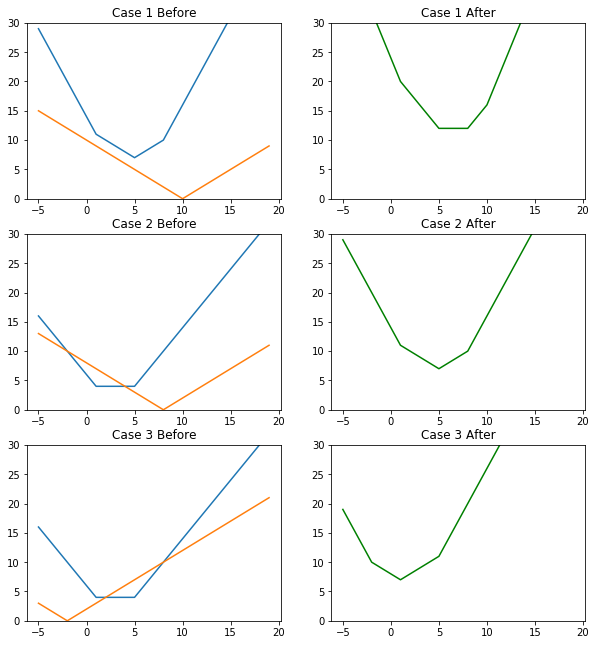

In [4]:
def f2(x):
    return abs(x - 1) + abs(x - 5)

def f3(x):
    return abs(x - 1) + abs(x - 5) + abs(x - 8)

def a_2(x):
    return abs(x + 2)

def a8(x):
    return abs(x - 8)

def a10(x):
    return abs(x - 10)

x = list(range(-5, 20, 1))
case1_before = [f3(a) for a in x]
a10_graph = [a10(a) for a in x]
case1_after = [f3(a) + a10(a) for a in x]

case2_before = [f2(a) for a in x]
a8_graph = [a8(a) for a in x]
case2_after = [f2(a) + a8(a) for a in x]

case3_before = [f2(a) for a in x]
a_2_graph = [a_2(a) for a in x]
case3_after = [f2(a) + a_2(a) for a in x]

fig, axs = plt.subplots(3, 2, figsize=(10, 11))

axs[0, 0].plot(x, case1_before)
axs[0, 0].plot(x, a10_graph)
axs[0, 0].set_ylim(0, 30)
axs[0, 0].set_title('Case 1 Before')

axs[0, 1].plot(x, case1_after, c='green')
axs[0, 1].set_ylim(0, 30)
axs[0, 1].set_title('Case 1 After')

axs[1, 0].plot(x, case2_before)
axs[1, 0].plot(x, a8_graph)
axs[1, 0].set_ylim(0, 30)
axs[1, 0].set_title('Case 2 Before')
                    
axs[1, 1].plot(x, case2_after, c='green')
axs[1, 1].set_ylim(0, 30)
axs[1, 1].set_title('Case 2 After')

axs[2, 0].plot(x, case3_before)
axs[2, 0].plot(x, a_2_graph)
axs[2, 0].set_ylim(0, 30)
axs[2, 0].set_title('Case 3 Before')
                    
axs[2, 1].plot(x, case3_after, c='green')
axs[2, 1].set_ylim(0, 30)
axs[2, 1].set_title('Case 3 After')

**ケース1**  
更新前の $g(x)$ の最小値は $x = median(a_i)$ の時であり、この例では $x=5$ の時です。また、 $g(x)$ の傾きの絶対値は $1$ 以上であり、追加される $y=|x-10|$ の傾きの絶対値も $1$ であるため、更新後の $f(x)$ の最小値も $x=5$ の時になります。

ここで一般化のために、$f(x)$ の最小値を与える $x$ を $x_{min}$ とし、$f(x)$ への更新の際に追加された $a$ を $a_{new}$ とします。そうすると、更新による最小値の変化量 $\Delta_{min}$ は、

$\Delta_{min} = f(x_{min}) - g(x_{min}) = |x_{min} - a_{new}|$

となります。  
ここで、 $x_{min}$ は更新前の $a_i$ の中央値であるため、更新による最小値の変化量 $\Delta_{min}$ は **更新前の中央値と追加された $a_{new}$ との距離** になります。

**ケース2, 3**  
更新前の $g(x)$ の最小値は $x$ が $a_i$ の中央値範囲にあるときであり、この例では $1 \leqq x \leqq 5$ の時です。**ケース1** と同様に、$g(x)$ の傾きの絶対値は中央値範囲の外では $1$ 以上であり、追加される $y=|x-a_{new}|$ の傾きの絶対値は $1$ であるため、$f(x)$ への更新の際の最小値の変化量は **更新前の中央値範囲において $a_{new}$ に最も近い点と $a_{new}$ との距離** となります。

### 中央値の更新

$f(x)$ の更新のたびに、 $a_i$ をソートして、中央値を求めていては計算量が大きく時間内に答えを求めることが出来ません。

そこで、2つの **Priority Queue** を使い、中央値の左側と右側をそれぞれ持たせるようにします。この時、**左側の最大値**と**右側の最小値**が中央値範囲になります。

実装は以下の通りです。  
まず追加された $a_{new}$ を**左側と右側の両方**に追加します。そして、**左側の最大値 $L_{max}$** と **右側の最小値 $R_{min}$** を取り出します。この時、
* $L_{max} \leqq R_{min}$ であれば、そのまま $L_{max}$ を左側に戻し、 $R_{min}$ を右側に戻します。  
* $L_{max} > R_{min}$ であった場合、 **$L_{max}$ を右側に入れ**、 **$R_{min}$を左側に入れます。**

以上の操作によって、常に $L_{max} \leqq R_{min}$ が保たれます。

実装上のテクニックとして、Python の Priority Queue (heapq) では最小値しか取り出せないため、左側に $a_{new}$ を追加するときは **符号を逆転** させておきます。

In [5]:
from heapq import heappush, heappop

left = []
right = []

A = [4, 8, 7, 3, 9, 12]
for i, a in enumerate(A, start=1):
    heappush(left, -a)
    heappush(right, a)
    
    left_max = -heappop(left)
    right_min = heappop(right)
    
    heappush(left, -min(left_max, right_min))
    heappush(right, max(left_max, right_min))
    
    print('Current a_i sequence:', sorted(A[:i]))
    print('Left median:', -min(left))
    print('Right median:', min(right), '\n')

Current a_i sequence: [4]
Left median: 4
Right median: 4 

Current a_i sequence: [4, 8]
Left median: 4
Right median: 8 

Current a_i sequence: [4, 7, 8]
Left median: 7
Right median: 7 

Current a_i sequence: [3, 4, 7, 8]
Left median: 4
Right median: 7 

Current a_i sequence: [3, 4, 7, 8, 9]
Left median: 7
Right median: 7 

Current a_i sequence: [3, 4, 7, 8, 9, 12]
Left median: 7
Right median: 8 



### Fの実装例

以上より、Fの実装は以下のようになります。

この実装では、$a_{new}$ が更新前の中央値範囲に入っている・いないに関わらず同じ処理で $f(x)$ の最小値を更新していることに注意してください（28行目）。  
以下の理由から同じ処理で最小値 (`min_val`) を更新することが出来ます
* $a_{new}$ が更新前の中央値範囲に入っていた場合、`left_max = right_min = a_new` となります。そのため、`abs(right_min - left_max) = 0` となり、`min_val` は変化しません。
* $a_{new}$ が更新前の中央値範囲の外だった場合、`left_max` か `right_min` のどちらかが $a_{new}$ となり、もう一方が $a_{new}$ に近い中央値範囲の境界となります。そのため、`abs(right_min - left_max` が `min_val` の変化量となります。

In [ ]:
import sys
from heapq import heappop, heappush


def main():
    input = sys.stdin.readline
    INF = 10**9 + 1
    Q = int(input())
    left = []
    right = []
    min_val = 0
    for _ in range(Q):
        q = list(map(int, input().split()))
        if q[0] == 1:
            a, b = q[1], q[2]

            # Update median
            heappush(left, -a)
            heappush(right, a)

            left_max = -heappop(left)
            right_min = heappop(right)

            heappush(left, -min(left_max, right_min))
            heappush(right, max(left_max, right_min))

            # Update minimum value of f(x)
            min_val += abs(right_min - left_max)
            min_val += b

        else:
            median = -heappop(left)
            print('{} {}'.format(median, min_val))

            heappush(left, -median)


if __name__ == '__main__':
    main()
